# V242 Spannungsverstärkung

## Auswertung der Messergebnisse

In [1]:
#Benötigte Pakete
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams["font.family"]='serif'
plt.rcParams["figure.figsize"][0] = 10
plt.rcParams["figure.figsize"][1] = 7
plt.rcParams['errorbar.capsize']=2
from scipy.optimize import curve_fit

### Teil 1: Verstärkung für verschiedene Gegenkopplungen

In [2]:
#Verwendete Kopplungswiderstände
RG=np.array([48.7e3,274e3,680e3])#Ohm

#### Gleichstrom (DC)

In [3]:
#Eingangsspannung
U1=np.linspace(-250e-3,250e-3,11) #Volt
U1_err=np.array([8,6,5,3,1.5,0.25,1.5,3,5,6,8])*1e-3

#erste Messreihe: RG=48.7e3 Ohm
UA1=np.array([3.75,2.80,2.15,1.40,0.768,0.005,-0.83,-1.68,-2.49,-3.30,-4.28])
UA1_err=np.array([0.11,0.08,0.06,0.04,0.023,0.003,0.03,0.05,0.07,0.10,0.13])

#zweite Messreihe: RG=274e3 Ohm
UA2=np.array([14.5,14.4,13.7,9.1,4.48,0.023,-4.62,-9.2,-13.1,-13.1,-13.2])
UA2_err=np.array([0.4,0.4,0.4,0.3,0.13,0.015,0.14,0.3,0.4,0.4,0.4])


In [4]:
def fit_function(x,a,b):
    return a*x+b

popt1,pcov1=curve_fit(fit_function,U1,UA1,sigma=UA1_err)
popt2,pcov2=curve_fit(fit_function,U1[2:9],UA2[2:9],sigma=UA2_err[2:9])

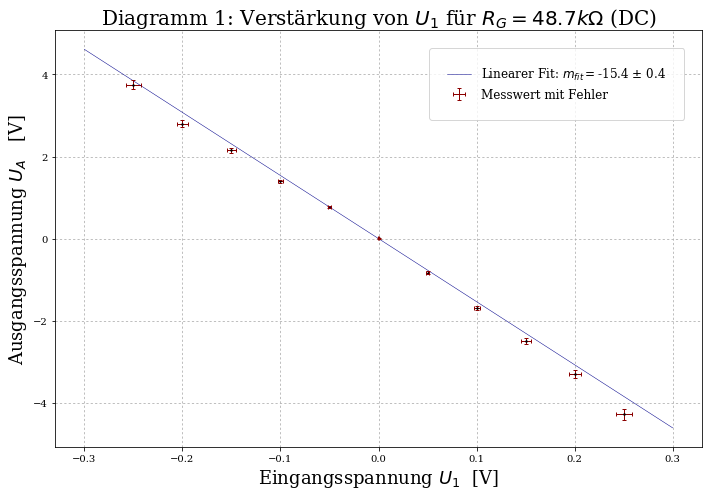

In [5]:
plt.plot(U1, UA1, marker='.',markersize=3, color='black',linewidth=1,linestyle=' ')
plt.plot(np.linspace(-0.3,0.3,10),fit_function(np.linspace(-0.3,0.3,10),*popt1),linewidth=0.5,color='darkblue',label='Linearer Fit: $m_{fit}=$' + str(round(popt1[0],1)) + ' $\pm$ ' + str(round(pcov1[0,0]**0.5,1)))
plt.errorbar(U1, UA1, xerr=U1_err, yerr=UA1_err,linewidth=1,linestyle='',color='darkred', label='Messwert mit Fehler')
plt.xlabel('Eingangsspannung $ U_1$  [V]', size=18)
plt.ylabel(r'Ausgangsspannung $ U_A$   [V]', size=18)
plt.title(r'Diagramm 1: Verstärkung von $U_1$ für $R_G=48.7 k\Omega$ (DC)', size=20)
plt.grid(ls='dotted')

plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5)

#Abspeichern des Bildes im Format "PDF"
plt.tight_layout()
plt.savefig('Diagramme/V242Diagramm1.pdf', format='PDF')

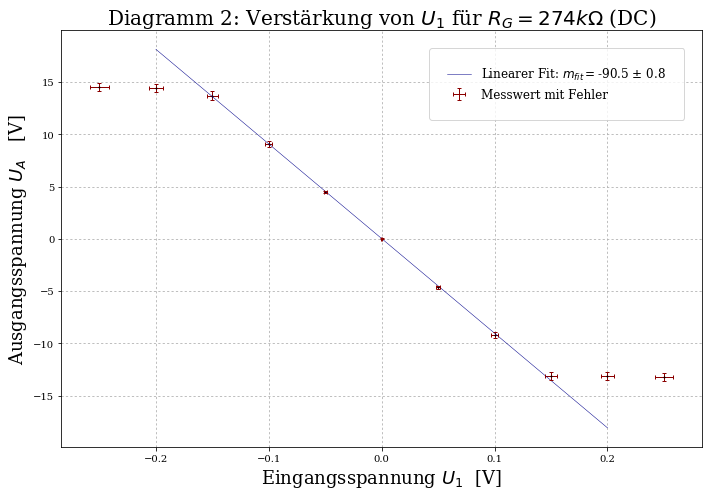

In [6]:
plt.plot(U1, UA2, marker='.',markersize=2, color='black',linewidth=1,linestyle=' ')
plt.plot(U1[1:10],fit_function(U1[1:10],*popt2),linewidth=0.5,color='darkblue',label='Linearer Fit: $m_{fit}=$' + str(round(popt2[0],1)) + ' $\pm$ ' + str(round(pcov2[0,0]**0.5,1)))
plt.errorbar(U1, UA2, xerr=U1_err, yerr=UA2_err,linewidth=1,linestyle='',color='darkred', label='Messwert mit Fehler')
plt.xlabel('Eingangsspannung $ U_1$  [V]', size=18)
plt.ylabel(r'Ausgangsspannung $ U_A$   [V]', size=18)
plt.title(r'Diagramm 2: Verstärkung von $U_1$ für $R_G=274 k\Omega$ (DC)', size=20)
plt.grid(ls='dotted')

plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5)

#Abspeichern des Bildes im Format "PDF"
plt.tight_layout()
plt.savefig('Diagramme/V242Diagramm2.pdf', format='PDF')

#### Wechselstrom (AC)

In [7]:
#Generatorspannung
UG=1e-3*np.array([124,252,372,500,629,752,884])
UG_err=0.03*UG

#erste Messreihe: RG=274e3 Ohm
UA3=np.array([1.07,2.16,3.21,4.30,5.42,6.46,7.66])
UA3_err=0.03*UA3

#zweite Messreihe: RG=680e3 Ohm
UA4=np.array([2.67,5.41,8.03,10.80,13.50,16.10,19.00])
UA4_err=0.03*UA4

In [8]:
popt3,pcov3 = curve_fit(fit_function,UG/10,UA3,sigma=UA3_err)
popt4,pcov4 = curve_fit(fit_function,UG/10,UA4,sigma=UA4_err)

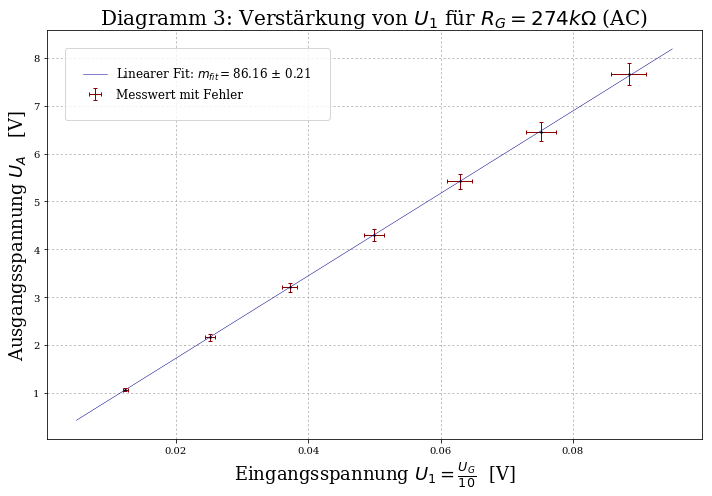

In [9]:
plt.plot(UG/10, UA3, marker='.',markersize=3, color='black',linewidth=1,linestyle=' ')
plt.plot(np.linspace(0.005,0.095,10),fit_function(np.linspace(0.005,0.095,10),*popt3),linewidth=0.5,color='darkblue',label='Linearer Fit: $m_{fit}=$' + str(round(popt3[0],2)) + ' $\pm$ ' + str(round(pcov3[0,0]**0.5,2)))
plt.errorbar(UG/10, UA3, xerr=UG_err/10, yerr=UA3_err,linewidth=1,linestyle='',color='darkred', label='Messwert mit Fehler')
plt.xlabel(r'Eingangsspannung $ U_1 = \frac{U_G}{10}$  [V]', size=18)
plt.ylabel(r'Ausgangsspannung $ U_A$   [V]', size=18)
plt.title(r'Diagramm 3: Verstärkung von $U_1$ für $R_G=274 k\Omega$ (AC)', size=20)
plt.grid(ls='dotted')

plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5)

#Abspeichern des Bildes im Format "PDF"
plt.tight_layout()
plt.savefig('Diagramme/V242Diagramm3.pdf', format='PDF')

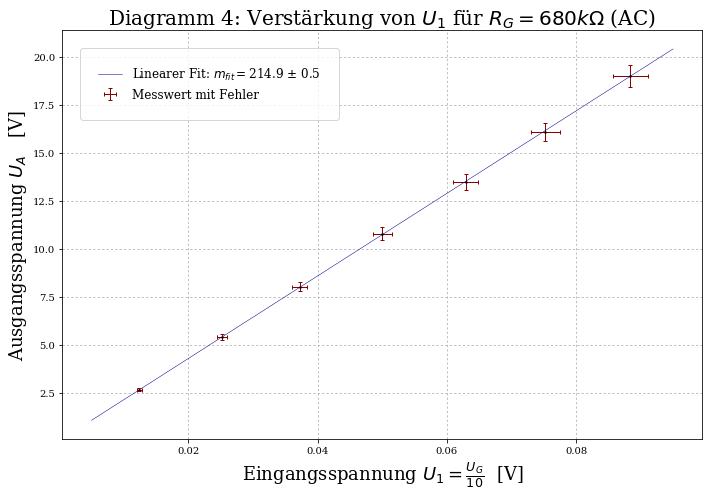

In [10]:
plt.plot(UG/10, UA4, marker='.',markersize=3, color='black',linewidth=1,linestyle=' ')
plt.plot(np.linspace(0.005,0.095,10),fit_function(np.linspace(0.005,0.095,10),*popt4),linewidth=0.5,color='darkblue',label='Linearer Fit: $m_{fit}=$' + str(round(popt4[0],1)) + ' $\pm$ ' + str(round(pcov4[0,0]**0.5,1)))
plt.errorbar(UG/10, UA4, xerr=UG_err/10, yerr=UA4_err,linewidth=1,linestyle='',color='darkred', label='Messwert mit Fehler')
plt.xlabel(r'Eingangsspannung $ U_1 = \frac{U_G}{10}$  [V]', size=18)
plt.ylabel(r'Ausgangsspannung $ U_A$   [V]', size=18)
plt.title(r'Diagramm 4: Verstärkung von $U_1$ für $R_G=680 k\Omega$ (AC)', size=20)
plt.grid(ls='dotted')

plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5)

#Abspeichern des Bildes im Format "PDF"
plt.tight_layout()
plt.savefig('Diagramme/V242Diagramm4.pdf', format='PDF')

### Teil 2: Frequenzgang des gegengekoppelten Verstärkers

In [11]:
#Teil 2a)

#Frequenzmesspunkte im Intervall 100Hz bis 300kHz
freq=1e3*np.array([0.1,0.4,0.7,1,4,7,10,40,70,100,300])
freq_err=50e-6*freq

UG1=0.3 #V_SS
UG1_err=0.03*UG1

#Wir rechnen die Spannungen um auf UG=1.0 V_SS um daraus direkt die Verstärkung zu erhalten

#erste Messreihe: U_SS=0.3V, RG=680e3 Ohm
UA5=np.array([6.62,6.62,6.58,6.45,4.67,3.30,2.47,0.670,0.384,0.272,0.090])*10/3
UA5_err=0.03*UA5*10/3
#zweite Messreihe: U_SS=0.3V, RG=274e3 Ohm
UA6=np.array([2.57,2.59,2.58,2.58,2.41,2.12,1.83,0.649,0.379,0.272,0.090])*10/3
UA6_err=0.03*UA6*10/3

UG2=1.0 #V_SS
UG2_err=0.03*UG2

#dritte Messreihe: U_SS=1.0V, RG=48.7e3 Ohm
UA7=np.array([1.54,1.54,1.54,1.54,1.54,1.53,1.52,1.26,0.976,0.770,0.291])
UA7_err=0.03*UA7

In [12]:
#Teil 2b)

#Es wird ein Kondensator parallel zu RG geschaltet. 

#Messung der Verstärkung am Frequenzgang: U_SS=1.0V, RG=48.7e3 Ohm, C=560 pF
UA8=np.array([1.54,1.54,1.54,1.52,1.30,1.02,0.808,0.240,0.139,0.097,0.033])
UA8_err=0.03*UA8

In [13]:
#Teil 2c)

#dieses Mal wird ein kleiner Kondensator am Eingang in den Schaltkreis eingebracht

#neuer Frequenzbereich von 300Hz bis 20kHz
freq2=1e3*np.array([0.3,0.7,1,4,7,10,20])
freq2_err=50e-6*freq2

#Messung der Verstärkung am Frequenzgang: U_SS=1.0V, RG=48.7e3 Ohm, C=47 nF
UA9=np.array([0.423,0.838,1.05,1.50,1.53,1.53,1.47])
UA9_err=0.03*UA9

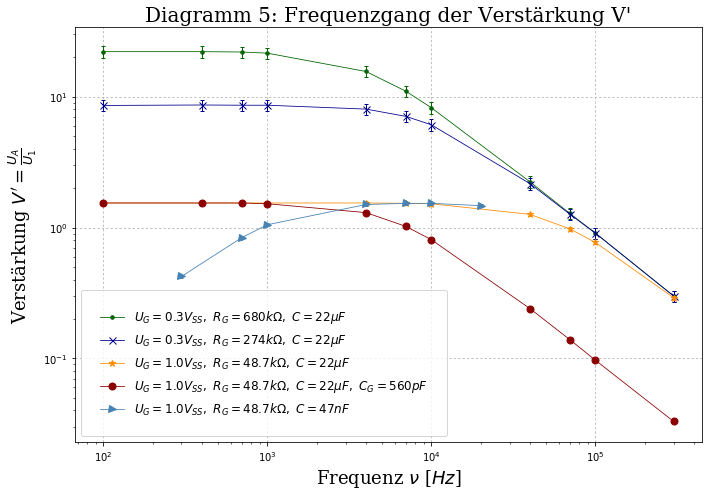

In [14]:
#Plot der Messwerte aus Aufgabe 2 in ein gemeinsames Koordinatensystem


#doppeltlogarithmische Achsen und Beschriftung
plt.xlabel(r'Frequenz $\nu$ [$Hz$]', size=18)
plt.ylabel(r"Verstärkung $V'= \frac{U_A}{U_1}$", size=18)
plt.title(r"Diagramm 5: Frequenzgang der Verstärkung V'", size=20)
plt.grid(ls='dotted')

plt.xscale('log')
plt.yscale('log')

#erste Kurve 2a
plt.plot(freq, UA5, marker='.',markersize=7, color='darkgreen',linewidth=0.8, label='$U_G=0.3 V_{SS}, \ R_G=680 k\Omega, \ C=22\mu  F$')
plt.errorbar(freq, UA5,xerr=freq_err, yerr=UA5_err,linewidth=1,linestyle='',color='darkgreen')

#zweite Kurve 2a
plt.plot(freq, UA6, marker='x',markersize=7, color='darkblue',linewidth=0.8, label='$U_G=0.3 V_{SS}, \ R_G=274 k\Omega, \ C=22\mu  F$')
plt.errorbar(freq, UA6,xerr=freq_err, yerr=UA6_err,linewidth=1,linestyle='',color='darkblue')

#dritte Kurve 2a
plt.plot(freq, UA7, marker='*',markersize=7, color='darkorange',linewidth=0.8, label='$U_G=1.0 V_{SS}, \ R_G=48.7 k\Omega, \ C=22\mu  F$')
plt.errorbar(freq, UA7,xerr=freq_err, yerr=UA7_err,linewidth=1,linestyle='',color='darkorange')

#Kurve 2b
plt.plot(freq, UA8, marker='o',markersize=7, color='darkred',linewidth=0.8, label='$U_G=1.0 V_{SS}, \ R_G=48.7 k\Omega, \ C=22\mu F, \ C_G=560  pF$')
plt.errorbar(freq, UA8,xerr=freq_err, yerr=UA8_err,linewidth=1,linestyle='',color='darkred')

#Kurve 2c
plt.plot(freq2, UA9, marker='>',markersize=7, color='steelblue',linewidth=0.8, label='$U_G=1.0 V_{SS}, \ R_G=48.7 k\Omega, \ C=47 nF$')
plt.errorbar(freq2, UA9,xerr=freq2_err, yerr=UA9_err,linewidth=1,linestyle='',color='steelblue')

plt.legend(frameon=True,fontsize='large', borderpad=1.6, borderaxespad=0.5)

#Abspeichern des Bildes im Format "PDF"
plt.tight_layout()
plt.savefig('Diagramme/V242Diagramm5.pdf', format='PDF')

### Teil 3: Impulsform eines Rechtecksignals für verschiedene Gegenkopplungen

Die zugehörigen Ausdrucke der Oszilloskopaufnahmen liegen der schriftlichen Ausarbeitung bei.  (Diagramm 6-14) Dort werden die Ergebnisse auch diskutiert.